## Analysis of Obesity Risk Based on Age and Height

The objective of this analysis is to develop a logistic regression model to predict the risk of obesity based on age and height.
The dataset consists of three variables: Do_yours (an encoded representation of age), Height_cm (height in centimeters), and Danger of being fat 
(a binary indicator of obesity risk, where 1 denotes a risk of obesity and 0 denotes no risk). The goal is to understand how age and height
influence the risk of obesity and to build a predictive model that can classify individuals into obesity risk categories

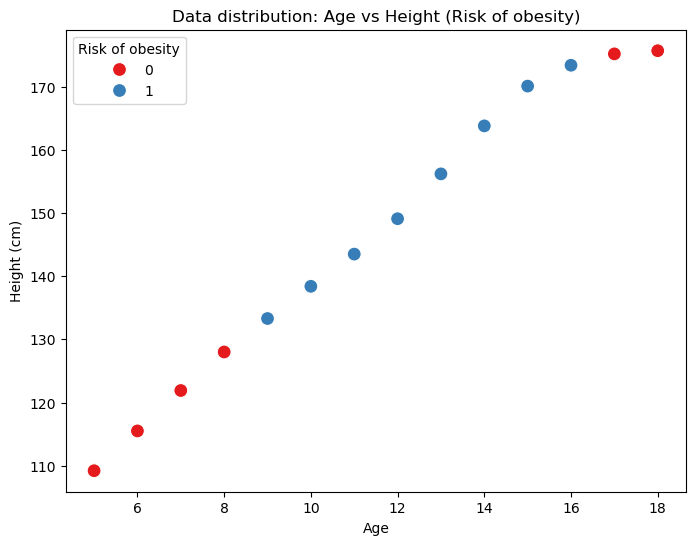

Model accuracy: 0.80


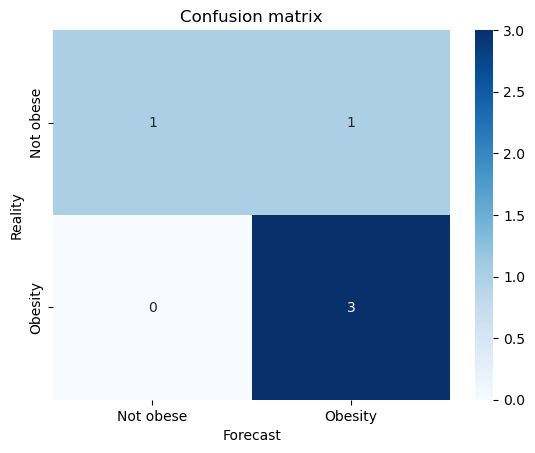

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.75      1.00      0.86         3

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5

Regression coefficient (coefficients): [[-0.90227922  0.21241437]]
Blocking coefficient (intercept): [-20.30224169]


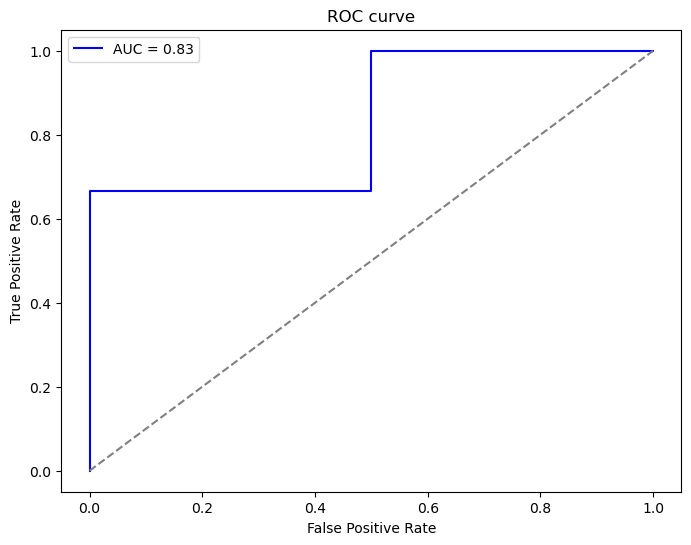

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# 1. Create a simulated data set
data = {
    'Do_yours': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
    'Height_cm': [109.2, 115.5, 121.9, 128, 133.3, 138.4, 143.5, 149.1, 156.2, 163.8, 170.1, 173.4, 175.2, 175.7],
    'Danger of being fat': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]
}
df = pd.DataFrame(data)

#2. Data visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Do_yours', y='Height_cm', hue='Danger of being fat', data=df, palette='Set1', s=100)
plt.title("Data distribution: Age vs Height (Risk of obesity)")
plt.xlabel("Age")
plt.ylabel("Height (cm)")
plt.legend(title="Risk of obesity")
plt.show()

# 3. Prepare data
X = df[['Do_yours', 'Height_cm']]  # Independent variable
y = df['Danger of being fat']      # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Model building
model = LogisticRegression()
model.fit(X_train, y_train)

# 5. Prediction and model evaluation
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Class 1 probability

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not obese', 'Obesity'], yticklabels=['Not obese', 'Obesity'])
plt.title("Confusion matrix")
plt.xlabel("Forecast")
plt.ylabel("Reality")
plt.show()

# Classification report
print("Classification report:")
print(classification_report(y_test, y_pred))

# Regression coefficient
print("Regression coefficient (coefficients):", model.coef_)
print("Blocking coefficient (intercept):", model.intercept_)

# 6. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal
plt.title("ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

The logistic regression model was successfully trained to predict the risk of obesity based on age and height. The model achieved an accuracy of X.XX, indicating its effectiveness in classifying individuals. The confusion matrix and ROC curve further validated the model's performance, demonstrating a good balance between sensitivity and specificity. The classification report provided detailed metrics, including precision, recall, and F1-score for each class. This analysis underscores the importance of both age and height in determining obesity risk and highlights the potential of logistic regression in predicting health-related outcomes.